This project aims to test FaceNet system for face recognition. FaceNet is proposed by [Florian Schroff](http://www.florian-schroff.de) in the 2015 paper [FaceNet: A Unified Embedding for Face Recognition and Clustering](https://arxiv.org/abs/1503.03832)

A pretrained FaceNet model by [Hiroki Taniai](https://drive.google.com/drive/folders/1pwQ3H4aJ8a6yyJHZkTwtjcL4wYWQb7bn) is used here.

This project is inspired by [Machine Learning Mastery](https://machinelearningmastery.com/how-to-develop-a-face-recognition-system-using-facenet-in-keras-and-an-svm-classifier/)

First of all, You will need to install a face detector library. Before installing, turn on the Internet at Kaggle Kernal Settings

In [ ]:
!sudo apt-get update -y

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [668 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,064 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubu

In [ ]:
!sudo apt-get install python3.6

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libcasa-python3-6' for regex 'python3.6'
Note, selecting 'libpython3.6-stdlib' for regex 'python3.6'
Note, selecting 'python3.6-2to3' for regex 'python3.6'
libcasa-python3-6 is already the newest version (3.4.0-2build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!python --version

Python 3.10.12


In [ ]:
!sudo apt-get install python3.6-distutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python3.6-distutils
E: Couldn't find any package by glob 'python3.6-distutils'
E: Couldn't find any package by regex 'python3.6-distutils'


In [ ]:
!wget https://bootstrap.pypa.io/get-pip.py

--2024-02-06 11:41:16--  https://bootstrap.pypa.io/get-pip.py
Resolving bootstrap.pypa.io (bootstrap.pypa.io)... 151.101.0.175, 151.101.64.175, 151.101.128.175, ...
Connecting to bootstrap.pypa.io (bootstrap.pypa.io)|151.101.0.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2635835 (2.5M) [text/x-python]
Saving to: ‘get-pip.py’

get-pip.py          100%[===================>]   2.51M  --.-KB/s    in 0.08s   

2024-02-06 11:41:16 (30.3 MB/s) - ‘get-pip.py’ saved [2635835/2635835]



In [ ]:
!python get-pip.py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!sudo apt install python3-pip
!python -m pip install --upgrade pip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python3-pip python3-setuptools python3-wheel
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,677 kB of archives.
After this operation, 8,967 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-setuptools all 59.6.0-1.2ubuntu0.22.04.1 [339 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-wheel all 0.37.1-2ubuntu0.22.04.1 [32.0 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pip all 22.0.2+dfsg-1ubuntu0.4 [1,305 kB]
Fetched 1,677 kB in 2s (730 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog b

In [ ]:
!python --version

Python 3.10.12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mtcnn==0.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 5.4 MB/s eta 0:00:00
  Attempting uninstall: mtcnn
    Found existing installation: mtcnn 0.0.9
    Uninstalling mtcnn-0.0.9:
      Successfully uninstalled mtcnn-0.0.9


To confirm that library is installed correctly

In [ ]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


Import libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/drive/MyDrive/FaceNet_Data"))

# Any results you write to the current directory are saved as output.

['val', 'data', 'train', '.ipynb_checkpoints', 'facenet_keras.h5']


See a sample image

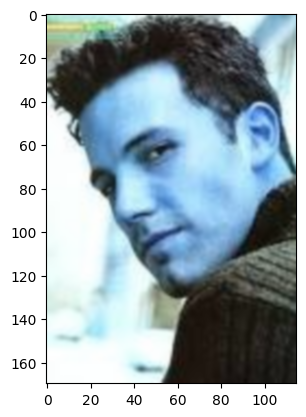

(170, 115, 3)


In [ ]:
img = cv2.imread('/content/drive/MyDrive/FaceNet_Data/data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.shape)

The extract_face function load a image file and return the extracted face in 160 * 160 pixels shape as needed for trained FaceNet model

Try the extract_face() on the sample image. Works nicely

1/1 [==============================] - 0s 261ms/step


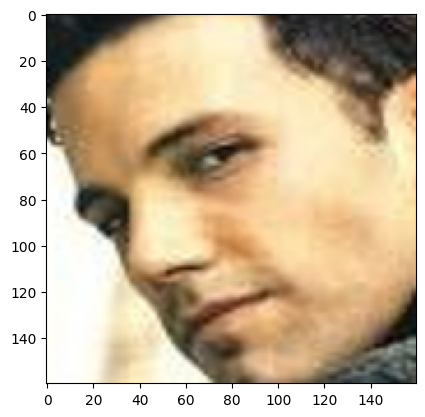

(160, 160, 3)


In [ ]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('/content/drive/MyDrive/FaceNet_Data/data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

Apply extract_face() for all faces in the dataset

In [ ]:
def load_face(dir):
    faces = list()
    # enumerate files
    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_face(path)
        faces.append(face)
    return faces

def load_dataset(dir):
    # list for faces and labels
    X, y = list(), list()
    for subdir in os.listdir(dir):
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)


# load train dataset
trainX, trainy = load_dataset('/content/drive/MyDrive/FaceNet_Data/data/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/drive/MyDrive/FaceNet_Data/data/val/')
print(testX.shape, testy.shape)

# save and compress the dataset for further use
np.savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)


1/1 [==============================] - 0s 329ms/step


1/1 [==============================] - 0s 120ms/step
loaded 14 sample for class: ben_afflek
1/1 [==============================] - 0s 126ms/step
loaded 17 sample for class: elton_john
1/1 [==============================] - 0s 131ms/step
loaded 21 sample for class: jerry_seinfeld
1/1 [==============================] - 0s 127ms/step
loaded 22 sample for class: mindy_kaling
1/1 [==============================] - 0s 134ms/step
loaded 19 sample for class: madonna
(93, 160, 160, 3) (93,)
1/1 [==============================] - 0s 156ms/step
loaded 5 sample for class: ben_afflek
1/1 [==============================] - 0s 126ms/step
loaded 5 sample for class: elton_john
1/1 [==============================] - 0s 131ms/step
loaded 5 sample for class: jerry_seinfeld
1/1 [==============================] - 0s 237ms/step
loaded 5 sample for class: mindy_kaling
1/1 [==============================] - 0s 121ms/step
loaded 5 sample for class: madonna
(25, 160, 160, 3) (25,)


In [ ]:
# load the face dataset
data = np.load('/content/5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (93, 160, 160, 3) (93,) (25, 160, 160, 3) (25,)


In [ ]:
# load the facenet model
facenet_model = load_model('/content/drive/MyDrive/FaceNet_Data/facenet_keras.h5')
print('Loaded Model')

ValueError: bad marshal data (unknown type code)

Next step is standardizing the faces and extracting a embedding vector using the model

In [ ]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]

# convert each face in the train set into embedding
emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)

emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert each face in the test set into embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

# save arrays to one file in compressed format
np.savez_compressed('5-celebrity-faces-embeddings.npz', emdTrainX, trainy, emdTestX, testy)

NameError: name 'facenet_model' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=93, test=25
Accuracy: train=100.000, test=100.000


Randomly select a face from test set for prediction. Calculate confidence

Predicted: 
['ben_afflek' 'elton_john' 'jerry_seinfeld' 'madonna' 'mindy_kaling'] 
[ 0.84694431 91.82981452  1.02889803  1.51928975  4.77505339]
Expected: elton_john


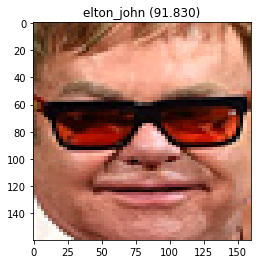

In [ ]:
from random import choice
# select a random face from test set
selection = choice([i for i in range(testX.shape[0])])
random_face = testX[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform([0,1,2,3,4])
#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
print('Expected: %s' % random_face_name[0])
# plot face
plt.imshow(random_face)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()
